In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
results = pd.read_csv("/Users/alexanderkell/Documents/PhD/Projects/18-battery-optimisation/data/results/run_data_battery_1_time_2021-03-28-17-15-03.csv")
results['datetime'] = pd.to_datetime(results['datetime'], errors='coerce')
results

FileNotFoundError: [Errno 2] File /Users/alexanderkell/Documents/PhD/Projects/18-battery-optimisation/data/results/run_data_battery_1_time_2021-03-28-17-15-03.csv does not exist: '/Users/alexanderkell/Documents/PhD/Projects/18-battery-optimisation/data/results/run_data_battery_1_time_2021-03-28-17-15-03.csv'

In [ ]:
results = results.rename(columns={"charge_solar": "Solar Charge", "charge_load": "Electricty Charge", "discharge_size": "Discharge", "current_solar": "Solar Power", "current_controlled_load_consumption": "Controlled Electricity Demand", "current_general_electricity_consumption": "General Electricity Demand", "current_charge": "Battery Charge Level"})
results

In [ ]:
results_long = results.drop(columns=["Unnamed: 0"]).melt(id_vars=["datetime"])
results_long

In [ ]:
sns.lineplot(data=results_long, x="datetime", y="value", hue="variable")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

In [ ]:
# see_status = results_long[results_long['variable'].isin(["current_charge", "current_solar", "discharge_size","current_controlled_load_consumption"])]

sns_plot = sns.lineplot(data=results_long[results_long.datetime<"2013-01-15"], x="datetime", y="value", hue="variable")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.xlabel("Date and time")
plt.ylabel("Value (kWh)")
sns_plot.get_figure().autofmt_xdate()

In [ ]:
see_status = results_long[results_long['variable'].isin(["Battery Charge Level", "Solar Power", "Discharge","Controlled Electricity Demand"])]

sns_plot = sns.lineplot(data=see_status[see_status.datetime<"2013-01-16"], x="datetime", y="value", hue="variable")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.xlabel("Date and time")
plt.ylabel("Value (kWh)")
sns_plot.get_figure().autofmt_xdate()

In [ ]:
see_status = results_long[results_long['variable'].isin(["Battery Charge Level", "Solar Power", "General Electricity Demand"])]

sns_plot = sns.lineplot(data=see_status[see_status.datetime<"2013-01-16"], x="datetime", y="value", hue="variable")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.xlabel("Date and time")
plt.ylabel("Value (kWh)")
sns_plot.get_figure().autofmt_xdate()

In [ ]:
see_status = results_long[results_long['variable'].isin(["Battery Charge Level", "General Electricity Demand", "Controlled Electricity Demand","Solar Power"])]

sns_plot = sns.lineplot(data=see_status[see_status.datetime<"2013-01-15"], x="datetime", y="value", hue="variable")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.xlabel("Date and time")
plt.ylabel("Value (kWh)")
sns_plot.get_figure().autofmt_xdate()

## Exploring all files

In [67]:
import glob

path = '/Users/alexanderkell/Documents/PhD/Projects/18-battery-optimisation/data/results/results_30-03-2021/DDPG' # use your path
all_files = glob.glob(path + "/*.csv")
li = []

for i, filename in enumerate(all_files):
    df = pd.read_csv(filename, index_col=None, header=0)
    df['battery_size'] = filename.split("battery_")[1].split("_time")[0]
    df['id'] = i
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,Unnamed: 0,datetime,charge_solar,charge_load,discharge_size,current_solar,current_controlled_load_consumption,current_general_electricity_consumption,current_charge,reward,battery_size,id
0,0,2013-01-14 00:00:00,1.400000,0.003141,1.400000,0.0,0.000,0.073,1.323859,-0.000000,1.4,0
1,1,2013-01-14 00:30:00,0.295313,0.158569,1.400000,0.0,0.000,0.115,1.278713,-0.000000,1.4,0
2,2,2013-01-14 01:00:00,0.273605,0.222139,1.400000,0.0,1.094,0.024,0.302435,-0.000000,1.4,0
3,3,2013-01-14 01:30:00,1.344929,0.019212,1.400000,0.0,1.263,0.126,0.000000,-0.002217,1.4,0
4,4,2013-01-14 02:00:00,0.919506,0.000000,1.400000,0.0,1.250,0.319,0.000000,-0.045630,1.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1039579,2347,2013-06-30 21:30:00,1.191029,0.000000,1.560857,0.0,0.000,0.260,1.300857,-0.000000,1.6,516
1039580,2348,2013-06-30 22:00:00,1.231419,0.000000,1.600000,0.0,0.000,0.274,1.326000,-0.000000,1.6,516
1039581,2349,2013-06-30 22:30:00,1.237544,0.001457,1.600000,0.0,0.000,0.509,1.089543,-0.000000,1.6,516
1039582,2350,2013-06-30 23:00:00,1.184127,0.000000,1.600000,0.0,0.000,0.166,1.434000,-0.000000,1.6,516


In [99]:
frame_renamed = frame.rename(columns={"charge_solar": "Solar Charge", "charge_load": "Electricty Charge", "discharge_size": "Discharge", "current_solar": "Solar Power", "current_controlled_load_consumption": "Controlled Electricity Demand", "current_general_electricity_consumption": "General Electricity Demand", "current_charge": "Battery Charge Level"})

frame_long = frame_renamed.drop(columns=["Unnamed: 0"]).melt(id_vars=["datetime","battery_size","reward", "id"])
frame_long['battery_size'] = pd.to_numeric(frame_long.battery_size)
frame_long.datetime = pd.to_datetime(frame_long.datetime)
frame_long['time'] = frame_long.datetime.dt.strftime('%H:%M')
frame_long

,datetime,battery_size,reward,id,variable,value,time
0,2013-01-14 00:00:00,1.4,-0.000000,0,Solar Charge,1.400000,00:00
1,2013-01-14 00:30:00,1.4,-0.000000,0,Solar Charge,0.295313,00:30
2,2013-01-14 01:00:00,1.4,-0.000000,0,Solar Charge,0.273605,01:00
3,2013-01-14 01:30:00,1.4,-0.002217,0,Solar Charge,1.344929,01:30
4,2013-01-14 02:00:00,1.4,-0.045630,0,Solar Charge,0.919506,02:00
...,...,...,...,...,...,...,...
7277083,2013-06-30 21:30:00,1.6,-0.000000,516,Battery Charge Level,1.300857,21:30
7277084,2013-06-30 22:00:00,1.6,-0.000000,516,Battery Charge Level,1.326000,22:00
7277085,2013-06-30 22:30:00,1.6,-0.000000,516,Battery Charge Level,1.089543,22:30
7277086,2013-06-30 23:00:00,1.6,-0.000000,516,Battery Charge Level,1.434000,23:00


In [100]:
frame_long['reward_mean'] = frame_long.groupby(["id"])['reward'].transform("mean")
frame_long

,datetime,battery_size,reward,id,variable,value,time,reward_mean
0,2013-01-14 00:00:00,1.4,-0.000000,0,Solar Charge,1.400000,00:00,-0.003030
1,2013-01-14 00:30:00,1.4,-0.000000,0,Solar Charge,0.295313,00:30,-0.003030
2,2013-01-14 01:00:00,1.4,-0.000000,0,Solar Charge,0.273605,01:00,-0.003030
3,2013-01-14 01:30:00,1.4,-0.002217,0,Solar Charge,1.344929,01:30,-0.003030
4,2013-01-14 02:00:00,1.4,-0.045630,0,Solar Charge,0.919506,02:00,-0.003030
...,...,...,...,...,...,...,...,...
7277083,2013-06-30 21:30:00,1.6,-0.000000,516,Battery Charge Level,1.300857,21:30,-0.000968
7277084,2013-06-30 22:00:00,1.6,-0.000000,516,Battery Charge Level,1.326000,22:00,-0.000968
7277085,2013-06-30 22:30:00,1.6,-0.000000,516,Battery Charge Level,1.089543,22:30,-0.000968
7277086,2013-06-30 23:00:00,1.6,-0.000000,516,Battery Charge Level,1.434000,23:00,-0.000968


In [101]:
frame_plot = frame_long#[(frame_long['variable'].isin(["Battery Charge Level", "Solar Power", "Discharge","Controlled Electricity Demand", "General Electricity Demand"]))]

frame_plot.to_csv("/Users/alexanderkell/Documents/PhD/Projects/18-battery-optimisation/data/processed/all_results.csv")

ValueError: invalid literal for int() with base 10: ''

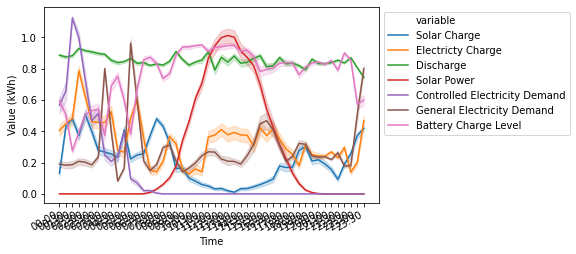

In [96]:
sns_plot = sns.lineplot(data=frame_plot[(frame_plot.battery_size==1) & (frame_plot.reward_sum >-87)], x="time", y="value", hue="variable")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.xlabel("Time")
plt.ylabel("Value (kWh)")
sns_plot.get_figure().autofmt_xdate()
for label in sns_plot.get_xticklabels():
    if np.int(label.get_text()) % 2 == 0:  
        label.set_visible(True)
    else:
        label.set_visible(False)